In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
assets_df = pd.read_csv('../../../datasets/b3_dados/processed/acoes_concat.csv')

1. **Histogramas**

Objetivo: Mostrar a distribuição dos preços de fechamento em um intervalo de valores.


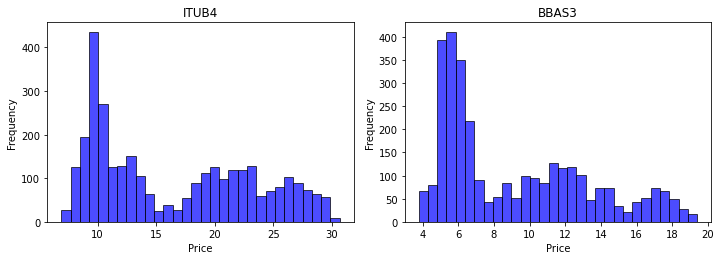

In [11]:

def plot_histograms(data, stocks):
    plt.figure(figsize=(20, 10))
    for i, stock in enumerate(stocks, 1):
        plt.subplot(3, 4, i)
        plt.hist(data[stock], bins=30, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'{stock}')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Exemplo
plot_histograms(assets_df, ['ITUB4', 'BBAS3'])


2. **Boxplots**

Visualizar a dispersão, mediana, quartis e outliers dos preços.

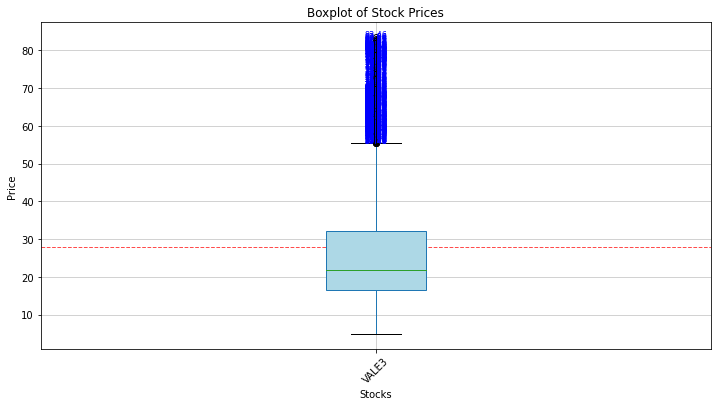


Estatísticas descritivas para VALE3:
count    3163.000000
mean       27.793777
std        18.020977
min         4.912045
25%        16.484820
50%        21.745810
75%        32.050522
max        83.462822
Name: VALE3, dtype: float64


In [21]:


def plot_boxplots(data, stocks):
    plt.figure(figsize=(12, 6))
    
    # Criar o boxplot
    boxplot = data.boxplot(column=stocks, patch_artist=True, return_type='dict')
    
    # Adicionar cores diferentes para cada caixa
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
    for patch, color in zip(boxplot['boxes'], colors[:len(stocks)]):
        patch.set_facecolor(color)
    
    # Adicionar linhas de referência para a média
    for stock in stocks:
        mean_price = data[stock].mean()
        plt.axhline(y=mean_price, color='red', linestyle='--', linewidth=1, alpha=0.7)
    
    # Adicionar anotações para outliers
    for idx, stock in enumerate(stocks):
        Q1 = data[stock].quantile(0.25)
        Q3 = data[stock].quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data[stock] < (Q1 - 1.5 * IQR)) | (data[stock] > (Q3 + 1.5 * IQR))][stock]
        for outlier in outliers:
            plt.text(idx + 1, outlier, f'{outlier:.2f}', horizontalalignment='center', color='blue', fontsize=8)
    
    # Configurações do gráfico
    plt.title('Boxplot of Stock Prices')
    plt.ylabel('Price')
    plt.xlabel('Stocks')
    plt.xticks(ticks=range(1, len(stocks) + 1), labels=stocks, rotation=45)
    plt.grid(alpha=0.7)
    plt.show()

    # Exibir estatísticas descritivas
    for stock in stocks:
        print(f"\nEstatísticas descritivas para {stock}:")
        print(data[stock].describe())

# Exemplo de execução
plot_boxplots(assets_df, ['VALE3'])
